#API Kaggel

In [ ]:
#Masukkan API Kaggle dengan format kaggle.json
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list
!kaggle datasets download -d mashlyn/online-retail-ii-uci

 34% 5.00M/14.5M [00:00<00:00, 38.8MB/s]
100% 14.5M/14.5M [00:00<00:00, 88.8MB/s]


In [ ]:
import zipfile

In [ ]:
dataset_zip = zipfile.ZipFile('/content/online-retail-ii-uci.zip')
dataset_zip.extractall()
dataset_zip.close()

#MODUL

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from numpy import math
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data Understanding

In [ ]:
df = pd.read_csv('/content/online_retail_II.csv')

##Deskripsi Fitur

- Invoice: Nomor faktur. Nominal. Nomor integral 6 digit yang ditetapkan secara unik untuk setiap transaksi. Jika kode ini diawali dengan huruf 'c', menandakan pembatalan.

- StockCode: Kode produk (item). Nominal. Bilangan integral 5 digit yang ditetapkan secara unik untuk setiap produk berbeda.

- Description : Nama produk (item). Nominal.

- Quantity: Jumlah setiap produk (item) per transaksi. numerik.

- InvoiceDate: Tanggal dan waktu faktur. numerik. Hari dan waktu transaksi dibuat.

- Price : Harga satuan. numerik. Harga produk per unit dalam sterling (Â£).

- Customer ID : Nomor pelanggan. Nominal. Nomor integral 5 digit yang ditetapkan secara unik untuk setiap pelanggan.

- Country : Nama negara. Nominal. Nama negara tempat tinggal pelanggan.


In [ ]:
df.head(5) # Melihat 5 baris pertama dari data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.shape # melihat jumlah baris dan kolom

(1067371, 8)

In [ ]:
df.info() # Melihat info tipe data dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
df.describe() #Melihat info

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [ ]:
df.isnull().sum() # melihat total jumlah yang kosong

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [ ]:
df.dropna(subset=['Customer ID'],inplace=True)  # Melakukan penghapusan data yang bernilai kosong

In [ ]:
df.isnull().sum() # Melihat nilai data yang kosong

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [ ]:
df["Description"].nunique()  # Melihat jumalah data yang unique

5299

In [ ]:
df[df['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Terdapat 18744 record dengan kuantitas negatif. Hal ini karena entri Faktur terkait telah dibatalkan -> Faktur dimulai dengan 'C' untuk transaksi yang dibatalkan

In [ ]:
index_name = df[(df['Quantity']<0)].index
df.drop(index_name, inplace = True)

In [ ]:
# changing the datatype to str
df['Invoice'] = df['Invoice'].astype('str')

In [ ]:
df=df[~df['Invoice'].str.contains('C')] # ?????????????????????

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805620 non-null  object 
 1   StockCode    805620 non-null  object 
 2   Description  805620 non-null  object 
 3   Quantity     805620 non-null  int64  
 4   InvoiceDate  805620 non-null  object 
 5   Price        805620 non-null  float64
 6   Customer ID  805620 non-null  float64
 7   Country      805620 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [ ]:
df[df['Price']<=0].sort_values('Price')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
840208,564651,22955,36 FOIL STAR CAKE CASES,144,2011-08-26 14:19:00,0.0,14646.0,Netherlands
840207,564651,23268,SET OF 2 CERAMIC CHRISTMAS REINDEER,192,2011-08-26 14:19:00,0.0,14646.0,Netherlands
840206,564651,23270,SET OF 2 CERAMIC PAINTED HEARTS,96,2011-08-26 14:19:00,0.0,14646.0,Netherlands
823515,562973,23157,SET OF 6 NATIVITY MAGNETS,240,2011-08-11 11:42:00,0.0,14911.0,EIRE
...,...,...,...,...,...,...,...,...
327801,521375,22202,MILK PAN PINK RETROSPOT,3,2010-09-05 11:58:00,0.0,12647.0,Germany
296375,518231,22472,TV DINNER TRAY DOLLY GIRL,9,2010-08-05 15:28:00,0.0,12471.0,Germany
276858,516304,22690,DOORMAT HOME SWEET HOME BLUE,6,2010-07-19 13:13:00,0.0,14025.0,United Kingdom
400047,527696,22121,NOEL WOODEN BLOCK LETTERS,1,2010-10-18 15:13:00,0.0,13554.0,United Kingdom


In [ ]:
df.shape

(805620, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805620 non-null  object 
 1   StockCode    805620 non-null  object 
 2   Description  805620 non-null  object 
 3   Quantity     805620 non-null  int64  
 4   InvoiceDate  805620 non-null  object 
 5   Price        805620 non-null  float64
 6   Customer ID  805620 non-null  float64
 7   Country      805620 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.3+ MB


In [ ]:
df['TotalAmount']=df['Quantity']*df['Price']

In [ ]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


##Feature Engineering


In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)

In [ ]:
df['Month']=df['InvoiceDate'].dt.month_name()

In [ ]:
df['Day']=df['InvoiceDate'].dt.day_name()

# EDA & Modeling

In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalAmount', 'year', 'Month',
       'Day'],
      dtype='object')

#RFM

In [ ]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount,year,Month,Day
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,December,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,December,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,December,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,December,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,December,Tuesday


In [ ]:
# Mengecek tanggal terlama dan terbaru
tanggal_terlama = df['InvoiceDate'].min()
tanggal_terbaru = df['InvoiceDate'].max()

print("Tanggal Terlama:", tanggal_terlama)
print("Tanggal Terbaru:", tanggal_terbaru)

Tanggal Terlama: 2009-12-01 07:45:00
Tanggal Terbaru: 2011-12-09 12:50:00


- Recency = Tanggal Terbaru - Tanggal Faktur Terakhir
- Frekuensi = jumlah no invoice. transaksi
- Moneter = Jumlah Total untuk setiap pelanggan

Tetapkan tanggal terbaru 9-12-2011 sebagai tanggal faktur terakhir adalah 01-12-2009.

In [ ]:
Latest_Date = dt.datetime(2011,12,9)

In [ ]:
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (Latest_Date - x.max()).days,  # Menghitung Recency
    'Invoice': lambda x: len(x),  # Menghitung Frequency
    'TotalAmount': lambda x: x.sum()  # Menghitung Monetary Value
})

In [ ]:
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5881 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceDate  5881 non-null   int64  
 1   Invoice      5881 non-null   int64  
 2   TotalAmount  5881 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 183.8 KB


In [ ]:
# Merubah Nama Atributnya
rfm_df.rename(columns={'InvoiceDate': 'Recency',
                        'Invoice': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head(10)

,Customer ID,Recency,Frequency,Monetary
0,12346.0,324,34,77556.46
1,12347.0,1,253,5633.32
2,12348.0,74,51,2019.40
3,12349.0,17,175,4428.69
4,12350.0,309,17,334.40
5,12351.0,374,21,300.93
6,12352.0,35,103,2849.84
7,12353.0,203,24,406.76
8,12354.0,231,58,1079.40
9,12355.0,213,35,947.61


In [ ]:
rfm_df.Recency.describe()

count    5881.000000
mean      199.992858
std       209.489651
min        -1.000000
25%        24.000000
50%        94.000000
75%       378.000000
max       737.000000
Name: Recency, dtype: float64

##Distribusi **RFM**

Frequency

In [ ]:
rfm_df['Frequency'].describe()

count     5881.000000
mean       136.986907
std        353.779018
min          1.000000
25%         21.000000
50%         53.000000
75%        142.000000
max      12890.000000
Name: Frequency, dtype: float64

<ipython-input-38-d15147c8114a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=rfm_df['Frequency'])


Text(0.5, 1.0, 'Distribution of Frequency')

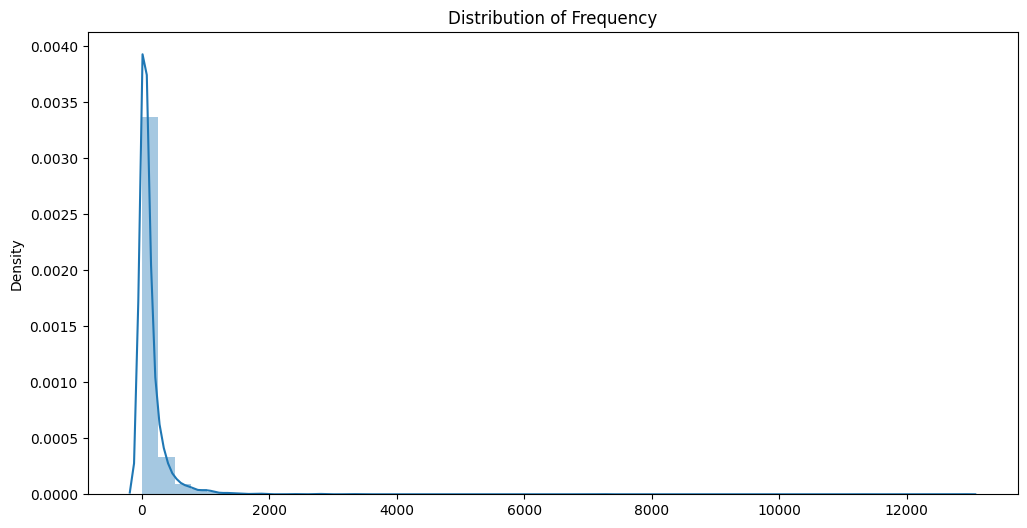

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_df['Frequency'])
plt.title('Distribution of Frequency')

Monetary

In [ ]:
rfm_df['Monetary'].describe()

count      5881.000000
mean       3017.076888
std       14734.128619
min           0.000000
25%         347.800000
50%         897.620000
75%        2304.180000
max      608821.650000
Name: Monetary, dtype: float64

<ipython-input-40-21204b5b13b5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=rfm_df['Monetary'])


Text(0.5, 1.0, 'Distribution of Monetary')

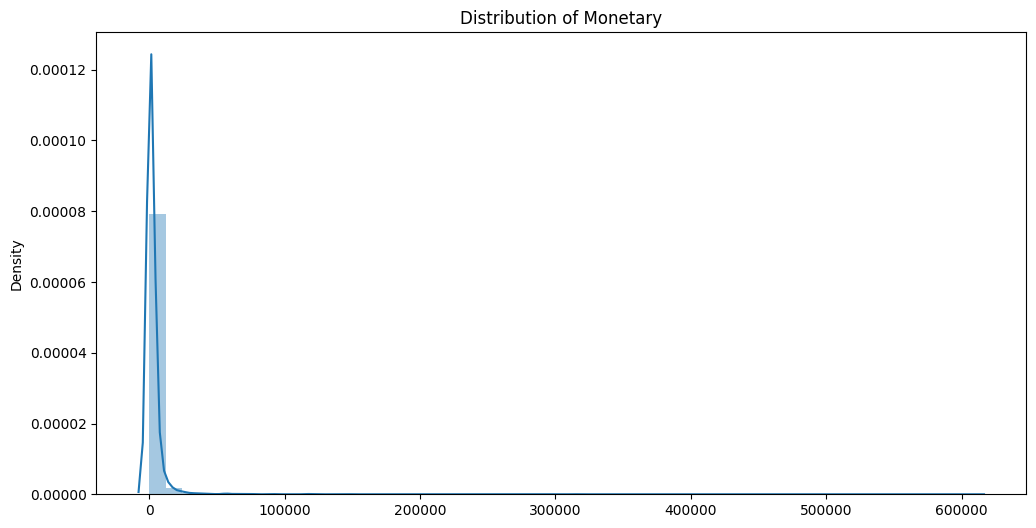

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_df['Monetary'])
plt.title('Distribution of Monetary')

Recency

<ipython-input-41-905b72f68830>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=rfm_df['Recency'])


Text(0.5, 1.0, 'Distribution of Recency')

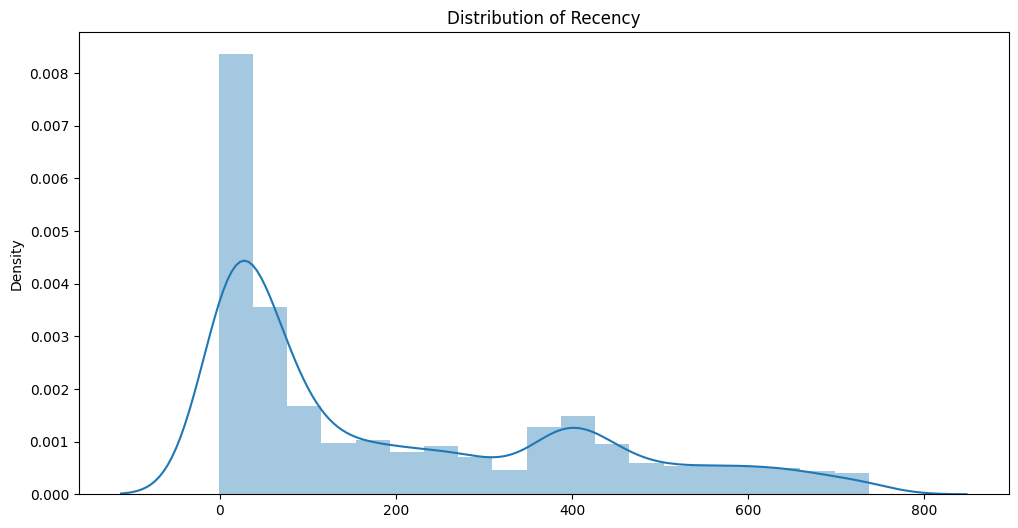

In [ ]:
#Recency
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_df['Recency'])
plt.title('Distribution of Recency')

##Quartil RFM

In [ ]:
quantile = rfm_df.quantile(q = [0.25,0.50,0.75])

In [ ]:
quantile = quantile.to_dict()

In [ ]:
quantile

{'Recency': {0.25: 24.0, 0.5: 94.0, 0.75: 378.0},
 'Frequency': {0.25: 21.0, 0.5: 53.0, 0.75: 142.0},
 'Monetary': {0.25: 347.8, 0.5: 897.62, 0.75: 2304.18}}

In [ ]:
def Recency_Scor(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
def Frequency_Scoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
def Monetary_Scoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
rfm_df["R"] = rfm_df['Recency'].apply(Recency_Scor,args=('Recency',quantile,))
rfm_df["F"] = rfm_df['Frequency'].apply(Frequency_Scoring,args=('Frequency',quantile,))
rfm_df["M"] = rfm_df['Monetary'].apply(Monetary_Scoring,args=('Monetary',quantile,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
Customer ID,,,,,,
12346.0,324,34,77556.46,2,3,1
12347.0,1,253,5633.32,4,1,1
12348.0,74,51,2019.40,3,3,2
12349.0,17,175,4428.69,4,1,1
12350.0,309,17,334.40,2,4,4


In [ ]:
rfm_df['RFM_Group'] = rfm_df.R.map(str)+rfm_df.F.map(str)+rfm_df.M.map(str)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group
Customer ID,,,,,,,
12346.0,324,34,77556.46,2,3,1,231
12347.0,1,253,5633.32,4,1,1,411
12348.0,74,51,2019.40,3,3,2,332
12349.0,17,175,4428.69,4,1,1,411
12350.0,309,17,334.40,2,4,4,244


In [ ]:
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score
Customer ID,,,,,,,,
12346.0,324,34,77556.46,2,3,1,231,6
12347.0,1,253,5633.32,4,1,1,411,6
12348.0,74,51,2019.40,3,3,2,332,8
12349.0,17,175,4428.69,4,1,1,411,6
12350.0,309,17,334.40,2,4,4,244,10


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5881 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    5881 non-null   int64  
 1   Frequency  5881 non-null   int64  
 2   Monetary   5881 non-null   float64
 3   R          5881 non-null   int64  
 4   F          5881 non-null   int64  
 5   M          5881 non-null   int64  
 6   RFM_Group  5881 non-null   object 
 7   RFM_Score  5881 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 413.5+ KB


##Labeling

In [ ]:
rfm_df['RFM_Score'].unique()

array([ 6,  8, 10,  7,  5, 12, 11,  4,  9,  3])

In [ ]:
Loyalty_Level = ['Bronze','Silver','Gold','Platinum']
Score_cut = pd.qcut(rfm_df['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_df['Loyalty_Level'] = Score_cut.values

In [ ]:
rfm_df.reset_index().head(10)

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Loyalty_Level
0,12346.0,324,34,77556.46,2,3,1,231,6,Bronze
1,12347.0,1,253,5633.32,4,1,1,411,6,Bronze
2,12348.0,74,51,2019.40,3,3,2,332,8,Gold
3,12349.0,17,175,4428.69,4,1,1,411,6,Bronze
4,12350.0,309,17,334.40,2,4,4,244,10,Platinum
5,12351.0,374,21,300.93,2,4,4,244,10,Platinum
6,12352.0,35,103,2849.84,3,2,1,321,6,Bronze
7,12353.0,203,24,406.76,2,3,3,233,8,Gold
8,12354.0,231,58,1079.40,2,2,2,222,6,Bronze
9,12355.0,213,35,947.61,2,3,2,232,7,Silver


In [ ]:
import pandas as pd

rfm_scores_to_lookup = [6, 8, 10, 7, 5, 12, 11, 4, 9, 3]

# Create a new DataFrame with RFM scores
rfm_scores_df = pd.DataFrame({'RFM_Score': rfm_scores_to_lookup})

# Perform the lookup using a merge between rfm_scores_df and rfm_df
result_df = rfm_scores_df.merge(rfm_df[['RFM_Score', 'Loyalty_Level']], on='RFM_Score', how='left')

# Sort the results by RFM_Score
sorted_results = result_df.sort_values(by='RFM_Score')
print(sorted_results)


      RFM_Score Loyalty_Level
5880          3        Bronze
5879          3        Bronze
5859          3        Bronze
5860          3        Bronze
5861          3        Bronze
...         ...           ...
4344         12      Platinum
4345         12      Platinum
4346         12      Platinum
4337         12      Platinum
4361         12      Platinum

[5881 rows x 2 columns]


In [ ]:
rfm_df[rfm_df['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Loyalty_Level
0,12482.0,575,204,23691.400,1,1,1,111,3,Bronze
1,17448.0,496,1117,14556.970,1,1,1,111,3,Bronze
2,14134.0,381,180,11123.350,1,1,1,111,3,Bronze
3,13206.0,399,581,8377.320,1,1,1,111,3,Bronze
4,12835.0,426,620,6043.310,1,1,1,111,3,Bronze
5,14249.0,409,291,5625.461,1,1,1,111,3,Bronze
6,14685.0,575,195,4619.790,1,1,1,111,3,Bronze
7,14648.0,415,455,4546.860,1,1,1,111,3,Bronze
8,15633.0,508,177,4352.460,1,1,1,111,3,Bronze
9,13446.0,429,192,3881.890,1,1,1,111,3,Bronze


In [ ]:
print(rfm_df.columns)

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Group',
       'RFM_Score', 'Loyalty_Level'],
      dtype='object')


In [ ]:
segmentation_based_on_RFM=rfm_df[['Recency','Frequency','Monetary','Loyalty_Level']]

In [ ]:
segmentation_based_on_RFM.groupby('Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency                Monetary  \
                     mean min  max        mean min    max         mean   
Loyalty_Level                                                            
Bronze         149.697906  -1  737  313.410269   1  12890  7162.388097   
Silver         211.148744  -1  734   89.312563   1    547  1646.264986   
Gold           285.626785  -1  737   36.126539   1    225   725.022813   
Platinum       100.898704  -1  378   17.290931   1    121   312.277574   

                                        
                  min        max count  
Loyalty_Level                           
Bronze         349.40  608821.65  2006  
Silver         164.69   44534.30   995  
Gold             0.00  168472.50  2031  
Platinum         0.00    2046.00   849

In [ ]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

In [ ]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [ ]:
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [ ]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Loyalty_Level,Recency_log,Frequency_log,Monetary_log
Customer ID,,,,,,,,,,,,
12346.0,324,34,77556.46,2,3,1,231,6,Bronze,5.780744,3.526361,11.258761
12347.0,1,253,5633.32,4,1,1,411,6,Bronze,0.000000,5.533389,8.636454
12348.0,74,51,2019.40,3,3,2,332,8,Gold,4.304065,3.931826,7.610556
12349.0,17,175,4428.69,4,1,1,411,6,Bronze,2.833213,5.164786,8.395859
12350.0,309,17,334.40,2,4,4,244,10,Platinum,5.733341,2.833213,5.812338


#DATA PREPARATION

In [ ]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Loyalty_Level,Recency_log,Frequency_log,Monetary_log
Customer ID,,,,,,,,,,,,
12346.0,324,34,77556.46,2,3,1,231,6,Bronze,5.780744,3.526361,11.258761
12347.0,1,253,5633.32,4,1,1,411,6,Bronze,0.000000,5.533389,8.636454
12348.0,74,51,2019.40,3,3,2,332,8,Gold,4.304065,3.931826,7.610556
12349.0,17,175,4428.69,4,1,1,411,6,Bronze,2.833213,5.164786,8.395859
12350.0,309,17,334.40,2,4,4,244,10,Platinum,5.733341,2.833213,5.812338


In [ ]:
rfm_df['Loyalty_Level'].unique()

['Bronze', 'Gold', 'Platinum', 'Silver']
Categories (4, object): ['Bronze' < 'Silver' < 'Gold' < 'Platinum']

In [ ]:
loyalty_mapping = {
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
}

rfm_df['number_Loyalty_level'] = rfm_df['Loyalty_Level'].map(loyalty_mapping)

# Tampilkan DataFrame
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Loyalty_Level,Recency_log,Frequency_log,Monetary_log,number_Loyalty_level
Customer ID,,,,,,,,,,,,,
12346.0,324,34,77556.46,2,3,1,231,6,Bronze,5.780744,3.526361,11.258761,1
12347.0,1,253,5633.32,4,1,1,411,6,Bronze,0.000000,5.533389,8.636454,1
12348.0,74,51,2019.40,3,3,2,332,8,Gold,4.304065,3.931826,7.610556,3
12349.0,17,175,4428.69,4,1,1,411,6,Bronze,2.833213,5.164786,8.395859,1
12350.0,309,17,334.40,2,4,4,244,10,Platinum,5.733341,2.833213,5.812338,4
12351.0,374,21,300.93,2,4,4,244,10,Platinum,5.924256,3.044522,5.706878,4
12352.0,35,103,2849.84,3,2,1,321,6,Bronze,3.555348,4.634729,7.955018,1
12353.0,203,24,406.76,2,3,3,233,8,Gold,5.313206,3.178054,6.008223,3
12354.0,231,58,1079.40,2,2,2,222,6,Bronze,5.442418,4.060443,6.984161,1


In [ ]:
# Menghitung jumlah costumer dengan Loyalty_Level 'Silver'
Bronze = rfm_df[rfm_df['Loyalty_Level'] == 'Bronze'].shape[0]
Silver = rfm_df[rfm_df['Loyalty_Level'] == 'Silver'].shape[0]
Gold = rfm_df[rfm_df['Loyalty_Level'] == 'Gold'].shape[0]
Platinum = rfm_df[rfm_df['Loyalty_Level'] == 'Platinum'].shape[0]

print("Jumlah costumer dengan Loyalty_Level 'Bronze':", Bronze)
print("Jumlah costumer dengan Loyalty_Level 'Silver':", Silver)
print("Jumlah costumer dengan Loyalty_Level 'Gold':", Gold)
print("Jumlah costumer dengan Loyalty_Level 'Platinum':", Platinum)

Jumlah costumer dengan Loyalty_Level 'Bronze': 2006
Jumlah costumer dengan Loyalty_Level 'Silver': 995
Jumlah costumer dengan Loyalty_Level 'Gold': 2031
Jumlah costumer dengan Loyalty_Level 'Platinum': 849


In [ ]:
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Loyalty_Level,Recency_log,Frequency_log,Monetary_log,number_Loyalty_level
Customer ID,,,,,,,,,,,,,
12346.0,324,34,77556.46,2,3,1,231,6,Bronze,5.780744,3.526361,11.258761,1
12347.0,1,253,5633.32,4,1,1,411,6,Bronze,0.000000,5.533389,8.636454,1
12348.0,74,51,2019.40,3,3,2,332,8,Gold,4.304065,3.931826,7.610556,3
12349.0,17,175,4428.69,4,1,1,411,6,Bronze,2.833213,5.164786,8.395859,1
12350.0,309,17,334.40,2,4,4,244,10,Platinum,5.733341,2.833213,5.812338,4
12351.0,374,21,300.93,2,4,4,244,10,Platinum,5.924256,3.044522,5.706878,4
12352.0,35,103,2849.84,3,2,1,321,6,Bronze,3.555348,4.634729,7.955018,1
12353.0,203,24,406.76,2,3,3,233,8,Gold,5.313206,3.178054,6.008223,3
12354.0,231,58,1079.40,2,2,2,222,6,Bronze,5.442418,4.060443,6.984161,1


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5881 entries, 12346.0 to 18287.0
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Recency               5881 non-null   int64   
 1   Frequency             5881 non-null   int64   
 2   Monetary              5881 non-null   float64 
 3   R                     5881 non-null   int64   
 4   F                     5881 non-null   int64   
 5   M                     5881 non-null   int64   
 6   RFM_Group             5881 non-null   object  
 7   RFM_Score             5881 non-null   int64   
 8   Loyalty_Level         5881 non-null   category
 9   Recency_log           5881 non-null   float64 
 10  Frequency_log         5881 non-null   float64 
 11  Monetary_log          5881 non-null   float64 
 12  number_Loyalty_level  5881 non-null   category
dtypes: category(2), float64(4), int64(6), object(1)
memory usage: 563.2+ KB


In [ ]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,5881.0,200.022275,209.461601,1.0,24.000000,94.000000,378.000000,737.000000
Frequency,5881.0,136.986907,353.779018,1.0,21.000000,53.000000,142.000000,12890.000000
Monetary,5881.0,3017.077398,14734.128514,1.0,347.800000,897.620000,2304.180000,608821.650000
R,5881.0,2.504506,1.120627,1.0,2.000000,3.000000,4.000000,4.000000
F,5881.0,2.513178,1.127367,1.0,2.000000,3.000000,4.000000,4.000000
M,5881.0,2.500255,1.118205,1.0,2.000000,3.000000,4.000000,4.000000
RFM_Score,5881.0,7.517939,1.842449,3.0,6.000000,7.000000,9.000000,12.000000
Recency_log,5881.0,4.340165,1.738310,0.0,3.178054,4.543295,5.934894,6.602588
Frequency_log,5881.0,3.946839,1.446002,0.0,3.044522,3.970292,4.955827,9.464207
Monetary_log,5881.0,6.830355,1.399746,0.0,5.851628,6.799747,7.742480,13.319281


In [ ]:
rfm_df.columns

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Group',
       'RFM_Score', 'Loyalty_Level', 'Recency_log', 'Frequency_log',
       'Monetary_log', 'number_Loyalty_level'],
      dtype='object')

In [ ]:
rfm_df.shape

(5881, 13)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Pemilihan fitur dan target
X = rfm_df[['Recency', 'Frequency', 'Monetary']]  # Fitur yang akan digunakan
y = rfm_df['number_Loyalty_level']  # Atribut target yang akan diprediksi

# Pembagian data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Mencetak jumlah data latih dan data uji
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 4704
Jumlah data uji: 1177


#DECISION TREE


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pydotplus as pp
from IPython.display import Image
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Membuat objek model Decision Tree
model = DecisionTreeClassifier()

In [ ]:
# Melatih model menggunakan data latihan
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Memprediksi kelas nilai brightness menggunakan data uji
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=X.columns, filled=True)

# Draw graph
graph = pp.graph_from_dot_data(dot_data)
graph.write_png("tes1.png")

True

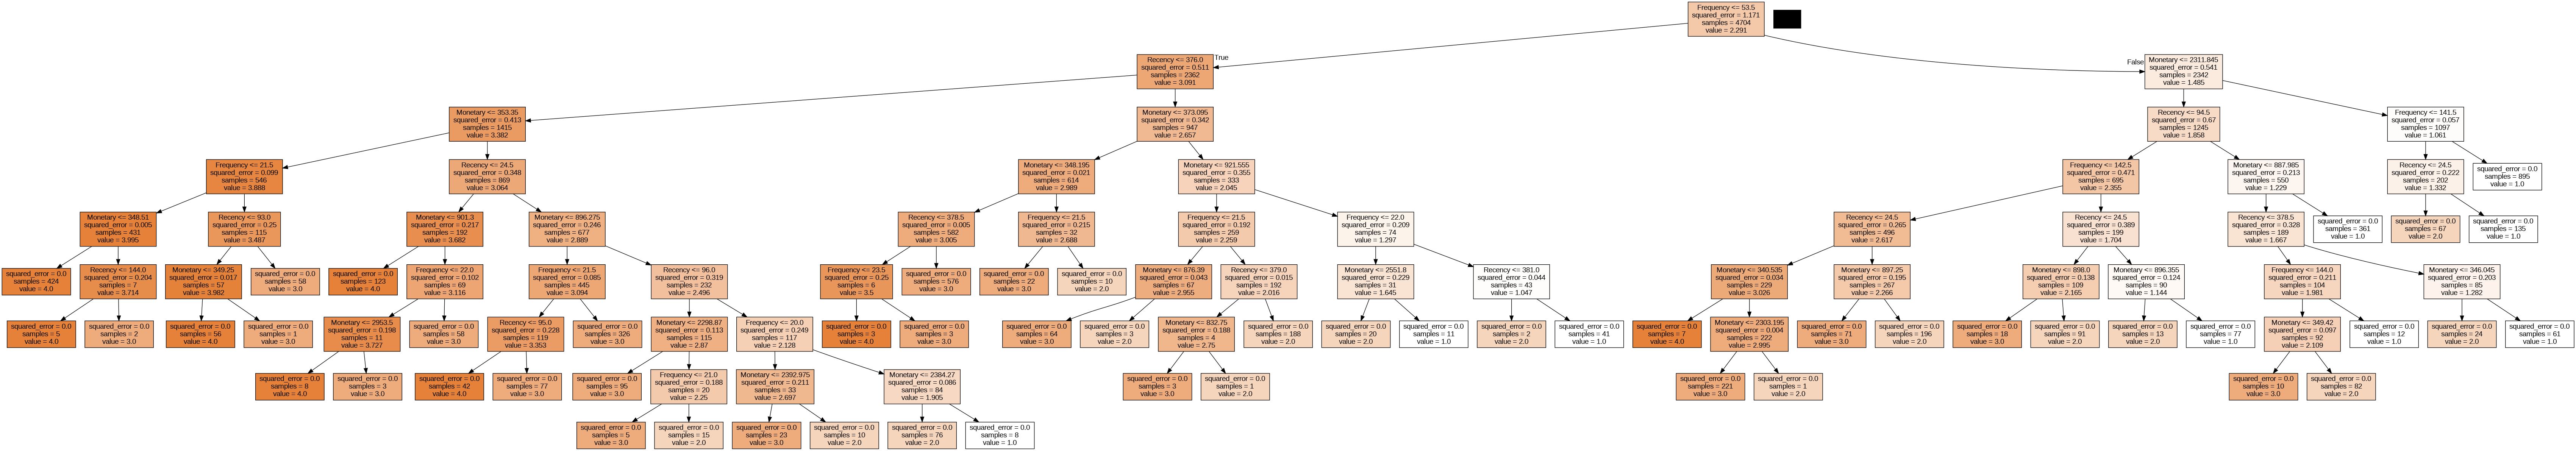

In [ ]:
Image(filename='tes1.png')

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("F1 Score:", f1score)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Akurasi: 0.9949022939677146
F1 Score: 0.9949215155103498
Precision: 0.9950058114174909
Recall: 0.9949022939677146
Confusion Matrix:
[[402   3   0   0]
 [  0 196   0   0]
 [  0   2 393   0]
 [  0   0   1 180]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      1.00       405
           2       0.98      1.00      0.99       196
           3       1.00      0.99      1.00       395
           4       1.00      0.99      1.00       181

    accuracy                           0.99      1177
   macro avg       0.99      1.00      0.99      1177
weighted avg       1.00      0.99      0.99      1177



# Random Forest

In [ ]:
import random
from sklearn.ensemble import RandomForestRegressor

In [ ]:
r=RandomForestRegressor(n_estimators=100,random_state=15)
r.fit(X_train,y_train)

RandomForestRegressor(random_state=15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import sklearn.metrics as met

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("F1 Score:", f1score)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Akurasi: 0.9932030586236194
F1 Score: 0.9932085510678121
Precision: 0.9932585843157851
Recall: 0.9932030586236194
Confusion Matrix:
[[403   2   0   0]
 [  0 194   2   0]
 [  0   1 394   0]
 [  0   0   3 178]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       405
           2       0.98      0.99      0.99       196
           3       0.99      1.00      0.99       395
           4       1.00      0.98      0.99       181

    accuracy                           0.99      1177
   macro avg       0.99      0.99      0.99      1177
weighted avg       0.99      0.99      0.99      1177



#NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Inisialisasi, melatih, dan melakukan prediksi dengan model Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("F1 Score:", f1score)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Akurasi: 0.5395072217502124
F1 Score: 0.5363655717460085
Precision: 0.6397680364796571
Recall: 0.5395072217502124
Confusion Matrix:
[[144 179  82   0]
 [ 10  74 111   1]
 [  0  31 249 115]
 [  0   0  13 168]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.36      0.52       405
           2       0.26      0.38      0.31       196
           3       0.55      0.63      0.59       395
           4       0.59      0.93      0.72       181

    accuracy                           0.54      1177
   macro avg       0.58      0.57      0.53      1177
weighted avg       0.64      0.54      0.54      1177



#logistic regresion

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Inisialisasi, melatih, dan melakukan prediksi dengan model Regresi Logistik
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = log_reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("F1 Score:", f1score)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Akurasi: 0.7323704333050127
F1 Score: 0.7197566260906059
Precision: 0.719807935960977
Recall: 0.7323704333050127
Confusion Matrix:
[[332  46  27   0]
 [ 50  51  95   0]
 [  6  26 335  28]
 [  0   0  37 144]]
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.82      0.84       405
           2       0.41      0.26      0.32       196
           3       0.68      0.85      0.75       395
           4       0.84      0.80      0.82       181

    accuracy                           0.73      1177
   macro avg       0.70      0.68      0.68      1177
weighted avg       0.72      0.73      0.72      1177



# Hasil Prediksi Decisioon Tree





In [ ]:
# Inisialisasi model Decision Tree Classifier
model = DecisionTreeClassifier()

In [ ]:
# Melatih model menggunakan data latih
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Melakukan prediksi untuk 5 data pertama dari data uji
predictions = model.predict(X_test.iloc[:5])

In [ ]:
# Membandingkan dengan nilai sebenarnya
actual_values = y_test.iloc[:5].values

In [ ]:
# Menampilkan hasil prediksi dan nilai sebenarnya
for i in range(5):
    print(f"Data ke-{i+1}: Prediksi = {predictions[i]}, Nilai Sebenarnya = {actual_values[i]}")

Data ke-1: Prediksi = 2, Nilai Sebenarnya = 2
Data ke-2: Prediksi = 2, Nilai Sebenarnya = 2
Data ke-3: Prediksi = 2, Nilai Sebenarnya = 2
Data ke-4: Prediksi = 3, Nilai Sebenarnya = 3
Data ke-5: Prediksi = 3, Nilai Sebenarnya = 3


# Nilai Inputan RFM Decision Tree

In [ ]:
rfm_df.head(5)

,Recency,Frequency,Monetary,R,F,M,RFM_Group,RFM_Score,Loyalty_Level,Recency_log,Frequency_log,Monetary_log,number_Loyalty_level
Customer ID,,,,,,,,,,,,,
12346.0,324,34,77556.46,2,3,1,231,6,Bronze,5.780744,3.526361,11.258761,1
12347.0,1,253,5633.32,4,1,1,411,6,Bronze,0.000000,5.533389,8.636454,1
12348.0,74,51,2019.40,3,3,2,332,8,Gold,4.304065,3.931826,7.610556,3
12349.0,17,175,4428.69,4,1,1,411,6,Bronze,2.833213,5.164786,8.395859,1
12350.0,309,17,334.40,2,4,4,244,10,Platinum,5.733341,2.833213,5.812338,4


In [ ]:
# Masukkan nilai RFM yang ingin Anda prediksi
new_RFM = [
    [324, 34, 77556.46],
    [1, 253, 5633.32],
    [74, 51, 2019.40],
    [17, 175, 4428.69],
    [309, 17, 334.40]
]

In [ ]:
# Buat dataframe baru untuk nilai RFM yang ingin diprediksi
new_data = pd.DataFrame(new_RFM, columns=['Recency', 'Frequency', 'Monetary'])

In [ ]:
# Gunakan model Decision Tree untuk melakukan prediksi
predicted_loyalty = model.predict(new_data)

In [ ]:
# Konversi nilai dari number_Loyalty_level ke Loyalty_Level
conversion_dict = {1: 'Bronze', 2: 'Silver', 3: 'Gold', 4: 'Platinum'}
predicted_loyalty_level = [conversion_dict[p] for p in predicted_loyalty]

In [ ]:
# Tampilkan hasil prediksi
print("Hasil Prediksi Loyalty Level:")
for i, pred in enumerate(predicted_loyalty_level):
    print(f"Data ke-{i+1}: Prediksi Loyalty Level = {pred}")

Hasil Prediksi Loyalty Level:
Data ke-1: Prediksi Loyalty Level = Bronze
Data ke-2: Prediksi Loyalty Level = Bronze
Data ke-3: Prediksi Loyalty Level = Gold
Data ke-4: Prediksi Loyalty Level = Bronze
Data ke-5: Prediksi Loyalty Level = Platinum


# Hasil Prediksi Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest Classifier
rf_model = RandomForestClassifier()

# Melatih model menggunakan data latih
rf_model.fit(X_train, y_train)

# Melakukan prediksi untuk 5 data pertama dari data uji
rf_predictions = rf_model.predict(X_test.iloc[:5])

# Membandingkan dengan nilai sebenarnya
actual_values = y_test.iloc[:5].values

# Menampilkan hasil prediksi dan nilai sebenarnya
for i in range(5):
    print(f"Data ke-{i+1}: Prediksi = {rf_predictions[i]}, Nilai Sebenarnya = {actual_values[i]}")


Data ke-1: Prediksi = 2, Nilai Sebenarnya = 2
Data ke-2: Prediksi = 2, Nilai Sebenarnya = 2
Data ke-3: Prediksi = 2, Nilai Sebenarnya = 2
Data ke-4: Prediksi = 3, Nilai Sebenarnya = 3
Data ke-5: Prediksi = 3, Nilai Sebenarnya = 3


In [ ]:
# Masukkan nilai RFM yang ingin Anda prediksi
new_RFM = [
    [324, 34, 77556.46],
    [1, 253, 5633.32],
    [74, 51, 2019.40],
    [17, 175, 4428.69],
    [309, 17, 334.40]
]

In [ ]:
# Buat dataframe baru untuk nilai RFM yang ingin diprediksi
new_data = pd.DataFrame(new_RFM, columns=['Recency', 'Frequency', 'Monetary'])

In [ ]:
# Gunakan model Random Forest untuk melakukan prediksi
predicted_loyalty = rf_model.predict(new_data)

In [ ]:
# Konversi nilai dari number_Loyalty_level ke Loyalty_Level
conversion_dict = {1: 'Bronze', 2: 'Silver', 3: 'Gold', 4: 'Platinum'}
predicted_loyalty_level = [conversion_dict[p] for p in predicted_loyalty]

In [ ]:
# Tampilkan hasil prediksi
print("Hasil Prediksi Loyalty Level (Random Forest):")
for i, pred in enumerate(predicted_loyalty_level):
    print(f"Data ke-{i+1}: Prediksi Loyalty Level = {pred}")

Hasil Prediksi Loyalty Level (Random Forest):
Data ke-1: Prediksi Loyalty Level = Bronze
Data ke-2: Prediksi Loyalty Level = Bronze
Data ke-3: Prediksi Loyalty Level = Gold
Data ke-4: Prediksi Loyalty Level = Bronze
Data ke-5: Prediksi Loyalty Level = Platinum


# Pengukuran Waktu Model

In [ ]:
from sklearn.metrics import accuracy_score
import time
# Prediksi dengan Decision Tree
predictions_decision_tree = model.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, predictions_decision_tree)

# Prediksi dengan Random Forest
predictions_random_forest = rf_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, predictions_random_forest)

In [ ]:
# Waktu yang dibutuhkan oleh Decision Tree
start_time_decision_tree = time.time()
predictions_decision_tree = model.predict(X_test)
end_time_decision_tree = time.time()
time_taken_decision_tree = end_time_decision_tree - start_time_decision_tree
time_taken_decision_tree = round(0.0028688907623291016, 4)

# Waktu yang dibutuhkan oleh Random Forest
start_time_random_forest = time.time()
predictions_random_forest = rf_model.predict(X_test)
end_time_random_forest = time.time()
time_taken_random_forest = end_time_random_forest - start_time_random_forest
time_taken_random_forest = round(0.051964759826660156, 4)

In [ ]:
# Menampilkan hasil
print("Decision Tree:")
print(f"Akurasi: {accuracy_decision_tree}")
print(f"Waktu yang dibutuhkan: {time_taken_decision_tree} detik\n")

print("Random Forest:")
print(f"Akurasi: {accuracy_random_forest}")
print(f"Waktu yang dibutuhkan: {time_taken_random_forest} detik")

#Kesimpulan

- Pengolahan data Menjadi nilai RFM
- Didapatkan Model 2 Model Terbaik dari Klasifikasi
- Model dengan akurasi dan waktu yang singkat di dapatkan pada model Decisiontree